# Logistic Regression Continued

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
penguins = pd.read_csv('DATA/penguins.csv')

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
penguins = penguins.drop(columns=penguins.columns[0])
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# we can see that there are a few nulls there. Let's just drop the nulls

penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


So, it looks like we have three categorical variables, all of type object:
species, island, and sex

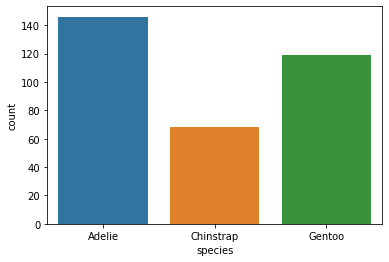

In [8]:

sns.countplot(penguins['species'])

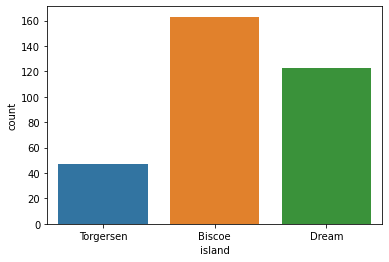

In [9]:
sns.countplot(penguins['island'])

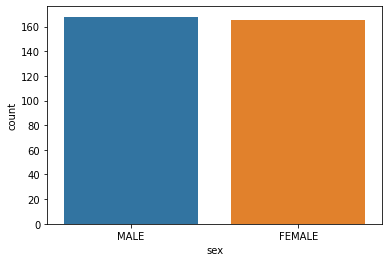

In [10]:
sns.countplot(penguins['sex'])

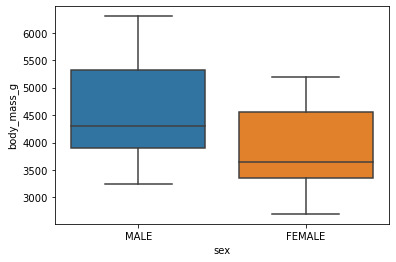

In [11]:
sns.boxplot( 'sex', 'body_mass_g', data=penguins)

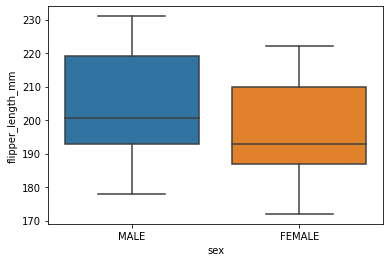

In [12]:
sns.boxplot( 'sex', 'flipper_length_mm', data=penguins)

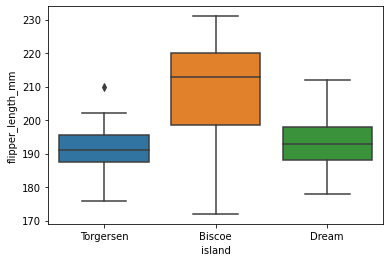

In [13]:
sns.boxplot( 'island', 'flipper_length_mm', data=penguins)

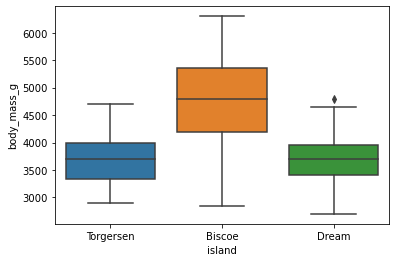

In [14]:
sns.boxplot( 'island', 'body_mass_g', data=penguins)

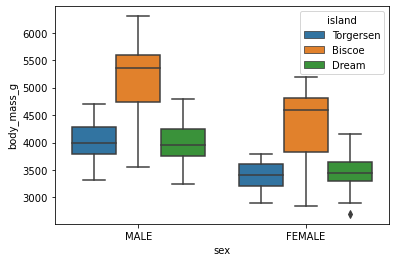

In [15]:
sns.boxplot( 'sex', 'body_mass_g', hue='island', data=penguins)

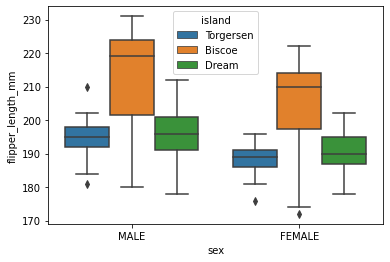

In [16]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='island', data=penguins)

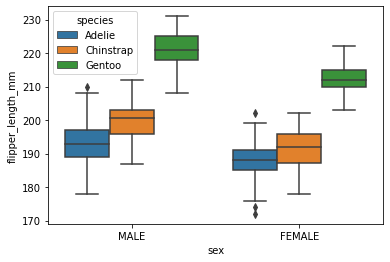

In [17]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='species', data=penguins)

In [ ]:
smf.logit() # binary categories
smf.mnlogit() # greater than 2 categories


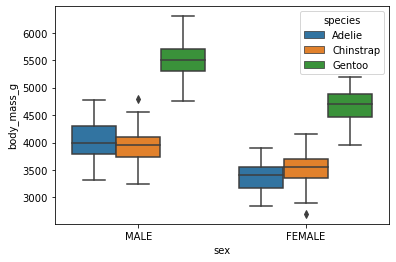

In [18]:
sns.boxplot( 'sex', 'body_mass_g', hue='species', data=penguins)

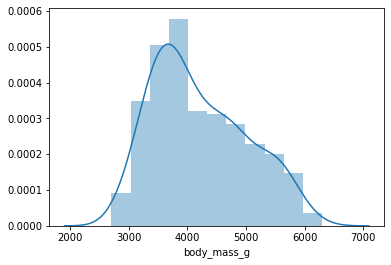

In [19]:
sns.distplot(penguins['body_mass_g'])

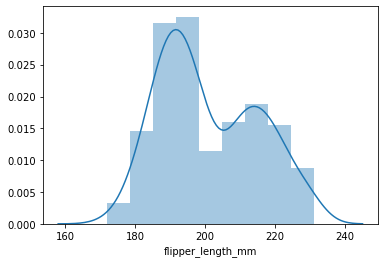

In [20]:
sns.distplot(penguins['flipper_length_mm'])

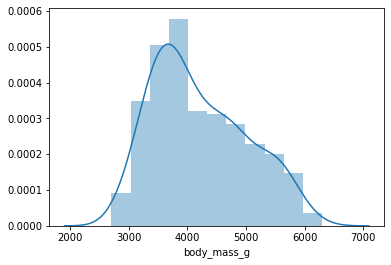

In [21]:
sns.distplot(penguins['body_mass_g'])

## So there is a lot of interesting variations in the penguin 'species' among our three categoricals!
However, to use the smf.logit function, we need BINARY variable

### We need to decide exactly WHAT we want to model.

Suggestions??

In [22]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [34]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   sex_code           333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 33.4+ KB


In [23]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(penguins['sex'])
le

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [24]:
penguins.loc[:,'sex_code'] = le
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1


In [25]:
train, test = statsmodels_train_test_split(penguins)

Since sex is the only binary categorical we have in this dataset, it is our only choice!!!

In [35]:
penguins.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [26]:
formula = 'sex ~ C(species) + C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g'


In [27]:
fitted_model = smf.logit(formula=formula, data=train, missing='drop').fit()


fitted_model.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (249, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

## unfortunately, statsmodels cannot deal with objects on the LHS. It likes numbers there! Sigh. 

We have to use the sex_code variable instead


In [38]:
formula = 'sex_code ~ C(species) + C(island) + bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g'
fitted_model = smf.logit(formula=formula, data=train).fit()


fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.189403
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               sex_code   No. Observations:                  249
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            8
Date:                Thu, 10 Sep 2020   Pseudo R-squ.:                  0.7267
Time:                        10:19:02   Log-Likelihood:                -47.161
converged:                       True   LL-Null:                       -172.54
Covariance Type:            nonrobust   LLR p-value:                 1.187e-49
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -83.5206     14.331     -5.828      0.000    -111.608     -55.433
C(species)[T.Chinstrap]    -6.7742      1.907     -3.553      0.000     -10.512      -3.037
C(species)[T.Gentoo]       -8.3336      3.064     -2.720      0.007     -14.338      -2.329
C(island)[T.Dream]         -0.0360      0.923     -0.039      0.969      -1.846       1.774
C(island)[T.Torgersen]     -0.8645      1.060     -0.816      0.415      -2.942       1.213
bill_length_mm              0.5279      0.147      3.598      0.000       0.240       0.815
bill_depth_mm               1.7026      0.430      3.955      0.000       0.859       2.546
flipper_length_mm           0.0488      0.054      0.902      0.367      -0.057       0.155
body_mass_g                 0.0062      0.001      4.867      0.000       0.004       0.009
===========================================================================================
"""

In [39]:
fitted_model.predict(test)

19     0.999994
237    0.999952
233    0.995122
39     0.999615
119    0.245069
         ...   
43     0.999962
70     0.063114
29     0.967066
262    0.000484
74     0.027278
Length: 84, dtype: float64

In [29]:
y_pred_test = np.round(fitted_model.predict(test))
y_pred_test

19     1.0
237    1.0
233    1.0
39     1.0
119    0.0
      ... 
43     1.0
70     0.0
29     1.0
262    0.0
74     0.0
Length: 84, dtype: float64

In [43]:
test['sex_code']

19     1
237    1
233    1
39     1
119    1
      ..
43     1
70     0
29     1
262    0
74     0
Name: sex_code, Length: 84, dtype: int64

In [44]:
y_pred_test

19     1.0
237    1.0
233    1.0
39     1.0
119    0.0
      ... 
43     1.0
70     0.0
29     1.0
262    0.0
74     0.0
Length: 84, dtype: float64

In [30]:
confusion_matrix(test['sex_code'], y_pred_test)

array([[33,  5],
       [ 3, 43]])

In [31]:
# So, our model did pretty well, only got 8 wrong from the test set!!!

By definition a confusion matrix `C[i, j]`
    is equal to the number of observations known to be in group `i` and
    predicted by the model to be in group `j`.

### Assignment: Work out the confusion matrix (TP, TN, FP, FN) for the case below BY HAND. Do not use the `confusion_matrix` function.


In [32]:
actual =    [0,0,0,0,0,1,1,1,1,1,1]

In [33]:
predicted = [1,1,0,0,1,0,0,1,1,1,0]

In [42]:
confusion_matrix(actual, predicted)

array([[2, 3],
       [3, 3]])